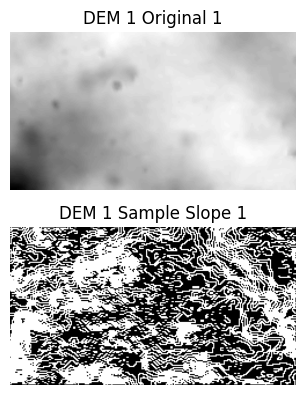

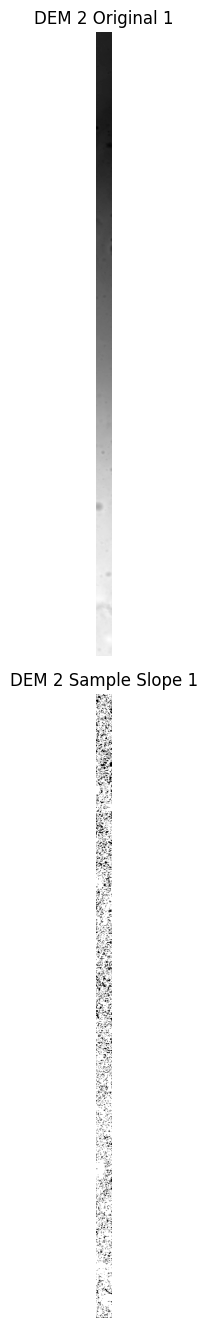

In [26]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import rasterio

# Function to preprocess DEM data
def preprocess_dem(dem):
    # Normalize the DEM data (values between 0 and 1)
    normalized_dem = dem / np.max(dem)
    # Scale the DEM data to 0-255 for visualization
    scaled_dem = (normalized_dem * 255).astype(np.uint8)
    return scaled_dem

# Function to identify slopes using edge Canny detection
def identify_slopes(dem):
    # Perform edge detection using Canny on the preprocessed DEM
    edges = cv2.Canny(dem, 50, 150)

    # Calculate gradient using Sobel operator
    gradient_x = cv2.Sobel(dem, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(dem, cv2.CV_64F, 0, 1, ksize=3)

    # Calculate magnitude and angle of the gradient
    magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    angle = np.arctan2(gradient_y, gradient_x) * (180 / np.pi)

    # Set threshold for slopes greater than 10 degrees
    slope_threshold = 10
    steep_slope_mask = np.zeros_like(dem)
    steep_slope_mask[np.abs(angle) > slope_threshold] = 255  # Using grayscale value for visualization

    return steep_slope_mask  # Return the mask for slopes greater than 10 degrees

# Load DEM datasets using rasterio
dem_dir_1 = '/kaggle/input/nacdem'
dem_dir_2 = '/kaggle/input/tmcdtm'

dem_files_1 = [os.path.join(dem_dir_1, f) for f in os.listdir(dem_dir_1) if f.endswith('.tif')]
dem_files_2 = [os.path.join(dem_dir_2, f) for f in os.listdir(dem_dir_2) if f.endswith('.tif')]

preprocessed_dem1 = []
preprocessed_dem2 = []

# Load and preprocess DEM datasets
for dem_file in dem_files_1:
    with rasterio.open(dem_file) as dem:
        dem_array = dem.read(1)
        preprocessed_dem1.append(preprocess_dem(dem_array))

for dem_file in dem_files_2:
    with rasterio.open(dem_file) as dem:
        dem_array = dem.read(1)
        preprocessed_dem2.append(preprocess_dem(dem_array))

# Identify slopes for both DEM datasets
slope_masks_1 = [identify_slopes(dem) for dem in preprocessed_dem1]
slope_masks_2 = [identify_slopes(dem) for dem in preprocessed_dem2]

# Display original images and sample slope images for both datasets with user-defined figure sizes
num_samples = 1
figsize_1 = (15, 6)  # Change figure size for DEM dataset 1
figsize_2 = (40, 20)  # Change figure size for DEM dataset 2

plt.figure(figsize=figsize_1)

# For DEM dataset 1
for i in range(num_samples):
    with rasterio.open(dem_files_1[i]) as dem:
        image = dem.read(1)
        plt.subplot(3, num_samples, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f'DEM 1 Original {i+1}')
        plt.axis('off')
    
    plt.subplot(3, num_samples, num_samples + i + 1)
    plt.imshow(slope_masks_1[i], cmap='gray')  # Grayscale colormap for better edge detection
    plt.title(f'DEM 1 Sample Slope {i+1}')
    plt.axis('off')
    # Save slope mask for DEM dataset 1
    plt.imsave(f'dem1_slope_{i+1}.png', slope_masks_1[i], cmap='gray')

plt.tight_layout()
plt.show()

plt.figure(figsize=figsize_2)

# For DEM dataset 2
for i in range(num_samples):
    with rasterio.open(dem_files_2[i]) as dem:
        image = dem.read(1)
        plt.subplot(3, num_samples, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f'DEM 2 Original {i+1}')
        plt.axis('off')

    plt.subplot(3, num_samples, num_samples + i + 1)
    plt.imshow(slope_masks_2[i], cmap='gray')  # Grayscale colormap for better edge detection
    plt.title(f'DEM 2 Sample Slope {i+1}')
    plt.axis('off')
    # Save slope mask for DEM dataset 2
    plt.imsave(f'dem2_slope_{i+1}.png', slope_masks_2[i], cmap='gray')

plt.tight_layout()
plt.show()


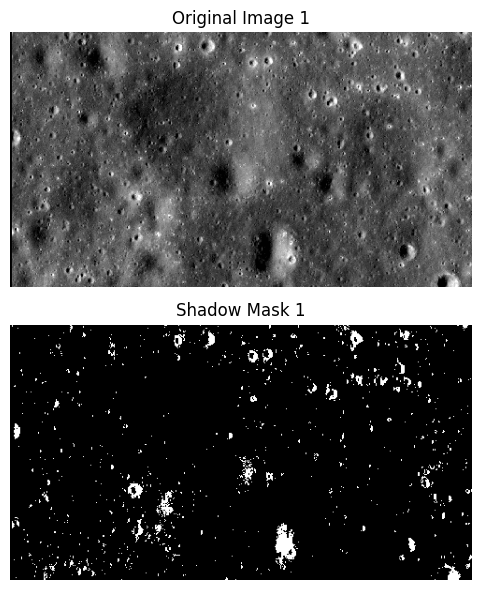

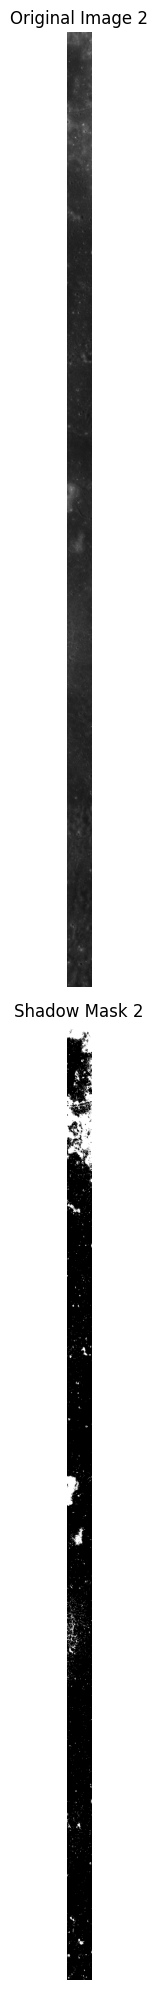

In [27]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import rasterio

# Function to detect shadows using intensity comparison
def detect_shadows(image):
    # Calculate a threshold based on intensity (adjust the value as needed)
    threshold_value = 150  # Adjust this threshold value for shadow detection
    _, thresh = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
    return thresh

# Load ORTH datasets using rasterio
orth_dir_1 = '/kaggle/input/orthonac123/ORTHONAC0.5-1/1'
orth_dir_2 = '/kaggle/input/tmcorth/TMCORTHO5-1/1'

orth_files_1 = [os.path.join(orth_dir_1, f) for f in os.listdir(orth_dir_1) if f.endswith('.tif')]
orth_files_2 = [os.path.join(orth_dir_2, f) for f in os.listdir(orth_dir_2) if f.endswith('.tif')]

# Process images and detect shadows
shadow_masks_1 = []
shadow_masks_2 = []

for orth_file in orth_files_1:
    with rasterio.open(orth_file) as orth:
        image = orth.read(1)  # Read a single-band grayscale image
        # Detect shadows in the image
        shadow_mask = detect_shadows(image)
        shadow_masks_1.append(shadow_mask)

for orth_file in orth_files_2:
    with rasterio.open(orth_file) as orth:
        image = orth.read(1)  # Read a single-band grayscale image
        # Detect shadows in the image
        shadow_mask = detect_shadows(image)
        shadow_masks_2.append(shadow_mask)

# Display sample images with shadow masks
num_samples = 1
figsize_1 = (7, 6)  # Change figure size for ORTH dataset 1
figsize_2 = (40, 20)  # Change figure size for ORTH dataset 2

plt.figure(figsize=figsize_1)

# For ORTH dataset 1
for i in range(num_samples):
    with rasterio.open(orth_files_1[i]) as orth:
        image = orth.read(1)  # Read a single-band grayscale image
        plt.subplot(2, num_samples, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title('Original Image 1')
        plt.axis('off')

        plt.subplot(2, num_samples, num_samples + i + 1)
        plt.imshow(shadow_masks_1[i], cmap='gray')
        plt.title('Shadow Mask 1')
        plt.axis('off')
        
        # Save shadow mask
        plt.imsave(f'shadow_mask_1_{i}.png', shadow_masks_1[i], cmap='gray')  # Save the shadow mask

plt.tight_layout()
plt.show()

plt.figure(figsize=figsize_2)

# For ORTH dataset 2
for i in range(num_samples):
    with rasterio.open(orth_files_2[i]) as orth:
        image = orth.read(1)  # Read a single-band grayscale image
        plt.subplot(2, num_samples, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title('Original Image 2')
        plt.axis('off')

        plt.subplot(2, num_samples, num_samples + i + 1)
        plt.imshow(shadow_masks_2[i], cmap='gray')
        plt.title('Shadow Mask 2')
        plt.axis('off')
        
        # Save shadow mask
        plt.imsave(f'shadow_mask_2_{i}.png', shadow_masks_2[i], cmap='gray')  # Save the shadow mask

plt.tight_layout()
plt.show()


In [28]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import torch
import torchvision
from torchvision import datasets, models
from torchvision.transforms import functional as FT
from torchvision import transforms as T
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import DataLoader, sampler, random_split, Dataset
import copy
import math
from PIL import Image
import cv2
import albumentations as A  # our data augmentation library

import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
# remove arnings (optional)
import warnings
warnings.filterwarnings("ignore")
from collections import defaultdict, deque
import datetime
import time
from tqdm import tqdm # progress bar
from torchvision.utils import draw_bounding_boxes

In [31]:
print(torch.__version__)
print(torchvision.__version__)

2.0.0
0.15.1


In [32]:
# our dataset is in cocoformat, we will need pypcoco tools
!pip install pycocotools
from pycocotools.coco import COCO

In [33]:
# Now, we will define our transforms
from albumentations.pytorch import ToTensorV2

In [34]:
def get_transforms(train=False):
    if train:
        transform = A.Compose([
            A.Resize(600, 600), # our input size can be 600px
            A.HorizontalFlip(p=0.3),
            A.VerticalFlip(p=0.3),
            A.RandomBrightnessContrast(p=0.1),
            A.ColorJitter(p=0.1),
            ToTensorV2()
        ], bbox_params=A.BboxParams(format='coco'))
    else:
        transform = A.Compose([
            A.Resize(600, 600), # our input size can be 600px
            ToTensorV2()
        ], bbox_params=A.BboxParams(format='coco'))
    return transform

In [35]:
class AquariumDetection(datasets.VisionDataset):
    def __init__(self, root, split='train', transform=None, target_transform=None, transforms=None):
        # the 3 transform parameters are reuqired for datasets.VisionDataset
        super().__init__(root, transforms, transform, target_transform)
        self.split = split #train, valid, test
        self.coco = COCO(os.path.join(root, split, "_annotations.coco.json")) # annotatiosn stored here
        self.ids = list(sorted(self.coco.imgs.keys()))
        self.ids = [id for id in self.ids if (len(self._load_target(id)) > 0)]
    
    def _load_image(self, id: int):
        path = self.coco.loadImgs(id)[0]['file_name']
        image = cv2.imread(os.path.join(self.root, self.split, path))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        return image
    def _load_target(self, id):
        return self.coco.loadAnns(self.coco.getAnnIds(id))
    
    def __getitem__(self, index):
        id = self.ids[index]
        image = self._load_image(id)
        target = self._load_target(id)
        target = copy.deepcopy(self._load_target(id))
        
        boxes = [t['bbox'] + [t['category_id']] for t in target] # required annotation format for albumentations
        if self.transforms is not None:
            transformed = self.transforms(image=image, bboxes=boxes)
        
        image = transformed['image']
        boxes = transformed['bboxes']
        
        new_boxes = [] # convert from xywh to xyxy
        for box in boxes:
            xmin = box[0]
            xmax = xmin + box[2]
            ymin = box[1]
            ymax = ymin + box[3]
            new_boxes.append([xmin, ymin, xmax, ymax])
        
        boxes = torch.tensor(new_boxes, dtype=torch.float32)
        
        targ = {} # here is our transformed target
        targ['boxes'] = boxes
        targ['labels'] = torch.tensor([t['category_id'] for t in target], dtype=torch.int64)
        targ['image_id'] = torch.tensor([t['image_id'] for t in target])
        targ['area'] = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0]) # we have a different area
        targ['iscrowd'] = torch.tensor([t['iscrowd'] for t in target], dtype=torch.int64)
        return image.div(255), targ # scale images
    def __len__(self):
        return len(self.ids)

In [36]:
dataset_path = "/kaggle/input/yolov7"

In [37]:
#load classes
coco = COCO(os.path.join(dataset_path, "train", "_annotations.coco.json"))
categories = coco.cats
n_classes = len(categories.keys())
categories

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!


{0: {'id': 0, 'name': 'crater-boulder', 'supercategory': 'none'},
 1: {'id': 1, 'name': 'crater', 'supercategory': 'crater-boulder'}}

In [38]:
classes = [i[1]['name'] for i in categories.items()]
classes

['crater-boulder', 'crater']

In [39]:
train_dataset = AquariumDetection(root=dataset_path, transforms=get_transforms(True))

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


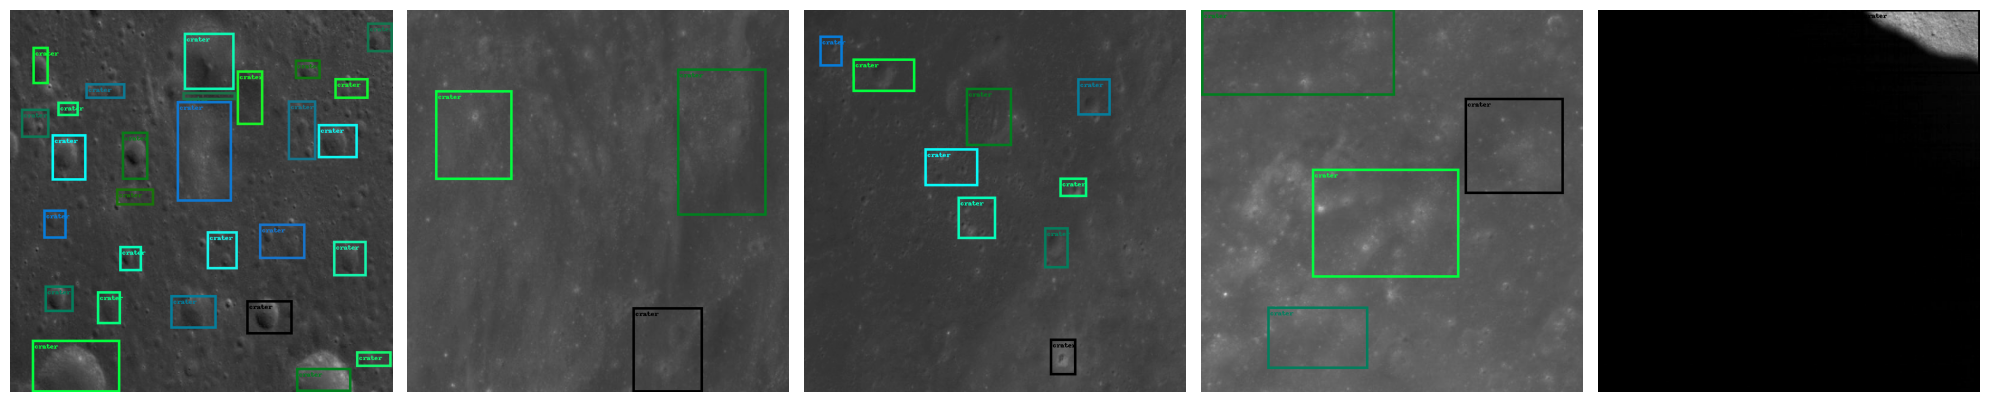

In [40]:
num_samples_to_display = 5  # Set the number of samples to display

fig, axes = plt.subplots(1, num_samples_to_display, figsize=(20, 10))

for i in range(num_samples_to_display):
    sample = train_dataset[i]  # Access each sample from the dataset
    img_int = torch.tensor(sample[0] * 255, dtype=torch.uint8)  # Convert image to tensor

    # Plot each image with bounding boxes
    axes[i].imshow(draw_bounding_boxes(
        img_int, sample[1]['boxes'], [classes[i] for i in sample[1]['labels']], width=4
    ).permute(1, 2, 0))
    axes[i].axis('off')  # Turn off axis labels
    
plt.tight_layout()
plt.show()


In [41]:
len(train_dataset)

1292

In [42]:
# lets load the faster rcnn model
model = models.detection.fasterrcnn_mobilenet_v3_large_fpn(pretrained=True)
in_features = model.roi_heads.box_predictor.cls_score.in_features # we need to change the head
model.roi_heads.box_predictor = models.detection.faster_rcnn.FastRCNNPredictor(in_features, n_classes)

In [43]:
def collate_fn(batch):
    return tuple(zip(*batch))

In [44]:
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=4, collate_fn=collate_fn)


In [45]:
images,targets = next(iter(train_loader))
images = list(image for image in images)
targets = [{k:v for k, v in t.items()} for t in targets]
output = model(images, targets) # just make sure this runs without error

In [46]:
device = torch.device("cpu")
model = model.to(device)


In [47]:
# Now, and optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.01, momentum=0.9, nesterov=True, weight_decay=1e-4)
# lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[16, 22], gamma=0.1) # lr scheduler

In [48]:
import sys

In [49]:
def train_one_epoch(model, optimizer, loader, device, epoch):
    model.to(device)
    model.train()
    
#     lr_scheduler = None
#     if epoch == 0:
#         warmup_factor = 1.0 / 1000 # do lr warmup
#         warmup_iters = min(1000, len(loader) - 1)
        
#         lr_scheduler = optim.lr_scheduler.LinearLR(optimizer, start_factor = warmup_factor, total_iters=warmup_iters)
    
    all_losses = []
    all_losses_dict = []
    
    for images, targets in tqdm(loader):
        images = list(image.to(device) for image in images)
        targets = [{k: torch.tensor(v).to(device) for k, v in t.items()} for t in targets]
        
        loss_dict = model(images, targets) # the model computes the loss automatically if we pass in targets
        losses = sum(loss for loss in loss_dict.values())
        loss_dict_append = {k: v.item() for k, v in loss_dict.items()}
        loss_value = losses.item()
        
        all_losses.append(loss_value)
        all_losses_dict.append(loss_dict_append)
        
        if not math.isfinite(loss_value):
            print(f"Loss is {loss_value}, stopping trainig") # train if loss becomes infinity
            print(loss_dict)
            sys.exit(1)
        
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()
        
#         if lr_scheduler is not None:
#             lr_scheduler.step() # 
        
    all_losses_dict = pd.DataFrame(all_losses_dict) # for printing
    print("Epoch {}, lr: {:.6f}, loss: {:.6f}, loss_classifier: {:.6f}, loss_box: {:.6f}, loss_rpn_box: {:.6f}, loss_object: {:.6f}".format(
        epoch, optimizer.param_groups[0]['lr'], np.mean(all_losses),
        all_losses_dict['loss_classifier'].mean(),
        all_losses_dict['loss_box_reg'].mean(),
        all_losses_dict['loss_rpn_box_reg'].mean(),
        all_losses_dict['loss_objectness'].mean()
    ))

In [ ]:
num_epochs = 10

for epoch in range(num_epochs):
    train_one_epoch(model, optimizer, train_loader, device, epoch)
    # Assuming lr_scheduler is active
    # lr_scheduler.step() 


100%|██████████| 323/323 [31:29<00:00,  5.85s/it]


Epoch 0, lr: 0.010000, loss: 1.206995, loss_classifier: 0.373083, loss_box: 0.506801, loss_rpn_box: 0.054689, loss_object: 0.272423


  1%|          | 4/323 [00:25<32:39,  6.14s/it]

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
from your_detection_module import AquariumDetection  # Import your detection module

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define dataset paths
dataset_paths = [
    '/kaggle/input/tmcorth/TMCORTHO5-1/1',
    '/kaggle/input/orthonac123/ORTHONAC0.5-1/1'
]

# Initialize the model
model = YourObjectDetectionModel()  # Replace with your object detection model
model = model.to(device)
model.eval()
torch.cuda.empty_cache()

num_images_to_display = 1  # Set the number of images to display for each dataset
count_displayed = 0

for dataset_path in dataset_paths:
    test_dataset = AquariumDetection(root=dataset_path, split="test", transforms=get_transforms(False))
    
    for i in range(len(test_dataset)):
        img, _ = test_dataset[i]
        with torch.no_grad():
            prediction = model([img.to(device)])
            pred = prediction[0]

        if count_displayed < num_images_to_display and len(pred['labels']) > 0:
            boxes_to_plot = pred['boxes'][pred['scores'] > 0.3]
            labels_to_plot = [classes[i] for i in pred['labels'][pred['scores'] > 0.2].tolist()]

            if len(labels_to_plot) != len(boxes_to_plot):
                print(f"Number of boxes and labels mismatch for image {i}")
                labels_to_plot = labels_to_plot[:len(boxes_to_plot)]

            img_int = torch.tensor(img * 255, dtype=torch.uint8)
            fig, ax = plt.subplots(1, 1, figsize=(10, 8))
            ax.imshow(draw_bounding_boxes(img_int, boxes_to_plot, labels_to_plot, width=4).permute(1, 2, 0))
            ax.set_title('Image with Bounding Boxes')
            ax.axis('off')
            plt.show()

            crater_masks = []
            boulder_masks = []
            for bbox, label in zip(boxes_to_plot, labels_to_plot):
                xmin, ymin, xmax, ymax = map(int, bbox.tolist())
                mask = np.zeros((img_int.shape[1], img_int.shape[2]), dtype=np.uint8)
                if label == 'crater':  # Detect and create a mask for craters
                    mask[ymin:ymax, xmin:xmax] = 1
                    crater_masks.append(mask)
                elif label == 'boulder':  # Detect and create a mask for boulders
                    mask[ymin:ymax, xmin:xmax] = 1
                    boulder_masks.append(mask)

            # Combine the masks
            combined_crater_mask = np.sum(crater_masks, axis=0)
            combined_boulder_mask = np.sum(boulder_masks, axis=0)

            fig, axes = plt.subplots(1, 3, figsize=(20, 8))
            axes[0].imshow(img_int.permute(1, 2, 0))
            axes[0].set_title('Original Image')
            axes[0].axis('off')

            axes[1].imshow(combined_crater_mask, cmap='gray')
            axes[1].set_title('Combined Crater Mask')
            axes[1].axis('off')

            axes[2].imshow(combined_boulder_mask, cmap='gray')
            axes[2].set_title('Combined Boulder Mask')
            axes[2].axis('off')

            plt.tight_layout()
            plt.show()

            count_displayed += 1

        if count_displayed >= num_images_to_display:
            break

    if count_displayed >= num_images_to_display:
        break
